In [1]:
import ROOT
from draw_funcs import draw_chi2_gaussian_sim
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/00


In [2]:
mfield = 1.3
input_path = '/var/kinfit/data/tr_ph_run021142.root'
output_path = 'kinfit_gaussian_fit_etapipi_etato2gamma_run021142_.root'

In [3]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

0

(int) 0


In [4]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

0

(int) 0


In [5]:
ROOT.gInterpreter.ProcessLine('.L TrPh.C++')

0

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/gauss_sim_etapipi_eta_to_2gamma_all_events/TrPh_C.so


In [6]:
ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

139879322361896

(TFile &) Name: /var/kinfit/data/tr_ph_run021142.root Title: 


In [7]:
ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

139878562004992

(TrPh &) @0x7f3804000000


In [8]:
ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

0

In [9]:
ROOT.gInterpreter.ProcessLine('fl.Close()')

0

In [10]:
fl = TFile.Open(output_path, 'read')

In [11]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                        return p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')

0

In [12]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 30, 2)')

139879322362760

(TF1 &) Name: f0 Title: f0


In [13]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 1.e+3)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 10)')

0

In [14]:
ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')

94026384131360

 FCN=529.959 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=1.27288e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.09479e+03   2.77176e+01   3.11853e-01  -5.72297e-06
   2  p1           6.23900e+00   2.51614e-02   2.83093e-04  -6.71375e-04
(TFitResultPtr) <nullptr TFitResult>


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


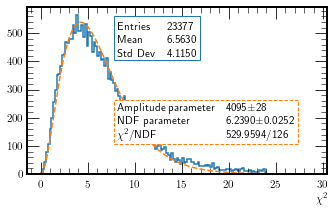

In [15]:
draw_chi2_gaussian_sim("kf_chi2", "f0", xlabel=r'$\chi^2$')

In [16]:
# fl.Close()